<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

 * $\omega_p  = 500$ Hz
 * $\omega_s  = 1500$ Hz
 * $\alpha_{max}  = 1$ dB
 * $\alpha_{min}  = 18$ dB

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.



\begin{equation}
n=\frac{log\frac{(10^{0.1·\alpha_{min}} - 1)}{(10^{0.1·\alpha_{Max}} - 1)}}{2·log(W_s)}
\end{equation}

In [79]:
import math
ws=1500
wp=500
wp_n=wp/wp
ws_n=ws/wp
n = math.log10((10**(1.8)-1)/(10**(0.1)-1))/(2*math.log10(ws_n));
print ("n = ",n)
print ("Por lo tanto el orden mínimo del filtro será: ",math.ceil(n))


n =  2.4940065748286493
Por lo tanto el orden mínimo del filtro será:  3


No es posible resolver el problema con un filtro de máxima planicidad.

b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


\begin{equation}
\epsilon^2=10^{0.1·\alpha_{Max}} - 1
\end{equation}

\begin{equation}
\alpha_{min}=10·log(1+\epsilon^2·cosh^2(n·acosh(ws_n))
\end{equation}

In [89]:
alphaCalc=0
alphamin=18
n=0
ws_n=3
eps_2=10**(0.1)-1
while alphaCalc <= alphamin:
    n+=1
    alphaCalc = 10*math.log10(1+eps_2*math.cosh(n*math.acosh(ws_n))**2)    
else:
    print ("eps_2 = ",eps_2)
    print ("alpha min calculada = ",alphaCalc)
    print ("para un n = ",n)

eps_2 =  0.2589254117941673
alpha min calculada =  18.7983787169381
para un n =  2


\begin{equation}
\sigma_k=-senh(a).sen(\frac{2·k-1}{2n}·\pi)
\end{equation}

\begin{equation}
\sigma_k=cosh(a).cos(\frac{2·k-1}{2n}·\pi)
\end{equation}

\begin{equation}
a=\frac{1}{n}·asenh(\frac{1}{\epsilon})
\end{equation}


In [56]:
import numpy as np
import math
pi=3.14156
k=0
n=2
sigma= np.ones(n+1)
omega= np.ones(n+1)
eps_2 =  0.2589254117941673
a=(1/n)* math.asinh(1/math.sqrt(eps_2))
while k < n:
    k+=1
    sigma[k]=-math.sinh(a)*math.sin(((2*k-1)*pi)/(2*n))      
    omega[k]=-math.cosh(a)*math.cos(((2*k-1)*pi)/(2*n)) 
    print ("sigma = ",sigma[k])
    print ("omega = ",omega[k])


sigma =  -0.5488626836428669
omega =  -0.8951358812804044
sigma =  -0.5488806059797905
omega =  0.8951066518805293


La funsion transferencia normalizada será:

\begin{equation}
H(s)=\frac{W_0^2}{s^2+s.\frac{w_0}{Q}+W_0^2}=\frac{1.136}{s^2+s.\frac{1.136}{.957}+1.136}
\end{equation}

\begin{equation}
Q=\frac{1}{2·cos(\psi)}
\end{equation}

In [61]:
Q=1/(2*(-sigma[1]/math.sqrt((sigma[1]**2)+(omega[1]**2))))
print ("Q = ",Q)

Q =  0.9565314209804201


findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


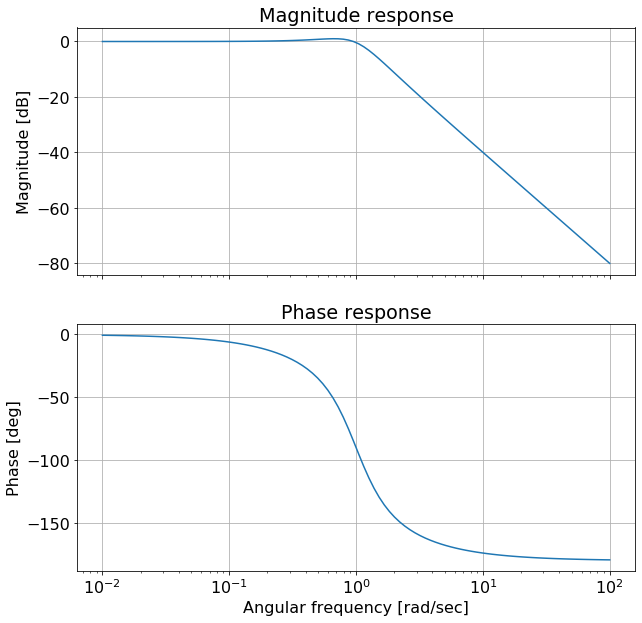

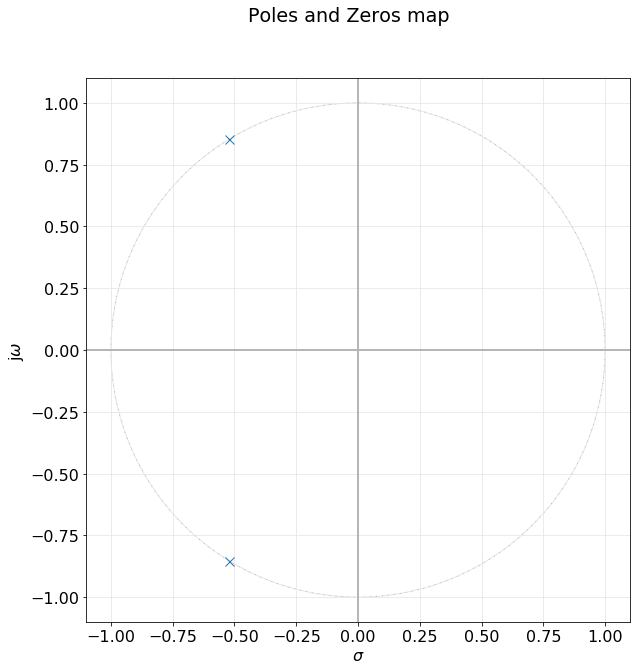

In [62]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1
Q = 0.9565

# Cargamos la funcion transferencia

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

######################################################
# O podría ser en mediante los coeficientes del
# numerador y denominador

#num = np.array([ 1. ])
#den = np.array([ 1., 0.5, 1.0 ])

######################################################


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()


 c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
  
 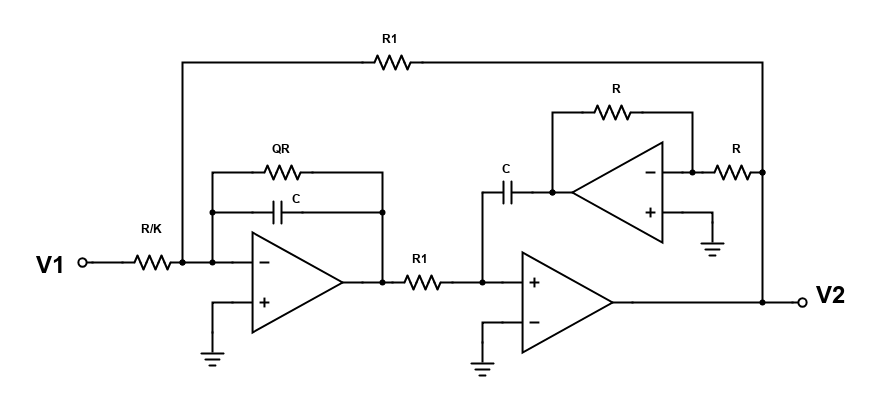

 

 Circuito normalizado:
 
 ![ACKMOSSLPN.png](attachment:ACKMOSSLPN.png)
 

 Circuito normalizado:
 
 ![ACKMOSSLP.png](attachment:ACKMOSSLP.png)

 Transferencia del circuito
 
 ![ACKMOSSLPTrans.png](attachment:ACKMOSSLPTrans.png)



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede encontrar un análisis pormenorizado de esta estructura en el libro de Schaumann.
</div>

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" /> Incluya capturas de:
<ul>
<li>la red simulada</li>
<li>al menos 2 detalles de la respuesta de módulo donde contrasta mediante cursores el correcto desempeño del filtro</li>
</ul> 
</div>

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio público tuyo de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online en mi github](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/desafio_cheby.ipynb) y [proyectado con nbviewer](https://github.com/marianux/jupytest/blob/master/desafio_cheby.ipynb). Yo prefiero usar la última opción, pero para gustos los colores ;)